In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

trips = pd.read_csv('../data/processed_trips_2018.csv')
stations = pd.read_csv('../data/processed_stations_2018.csv')


In [2]:
import seaborn as sns
def plot_station_clusters(df):
    n_clusters = len(set(df["station_cluster"]))
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=df, x='station_longitude', y='station_latitude', hue='station_cluster', palette='tab20', ax=ax)
    ax.set_title(f'Station Clusters (n={n_clusters})')


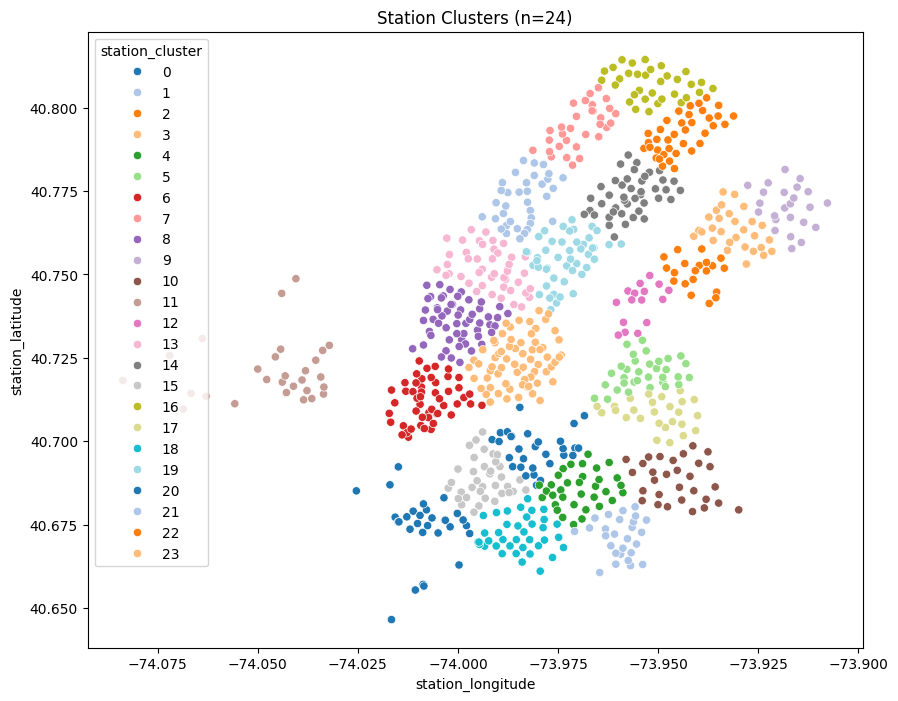

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=24)
kmeans.fit(stations[['station_latitude', 'station_longitude']])
stations['station_cluster'] = kmeans.labels_
plot_station_clusters(stations)

In [4]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,pickup_hour,pickup_day,dropoff_hour,dropoff_day
0,196,2018-01-01 00:01:50.650,2018-01-01 00:05:07.438,315.0,40.703554,-74.006702,259.0,40.701221,-74.012342,18534,Subscriber,1997,1,0,2018-01-01,0,2018-01-01
1,207,2018-01-01 00:02:43.918,2018-01-01 00:06:11.383,3224.0,40.739974,-74.005139,470.0,40.743453,-74.000040,19651,Subscriber,1978,1,0,2018-01-01,0,2018-01-01
2,613,2018-01-01 00:03:15.116,2018-01-01 00:13:28.480,386.0,40.714948,-74.002345,2008.0,40.705693,-74.016777,21678,Subscriber,1982,1,0,2018-01-01,0,2018-01-01
3,375,2018-01-01 00:06:43.709,2018-01-01 00:12:59.450,466.0,40.743954,-73.991449,325.0,40.736245,-73.984738,29822,Subscriber,1982,1,0,2018-01-01,0,2018-01-01
4,402,2018-01-01 00:06:56.924,2018-01-01 00:13:39.792,438.0,40.727791,-73.985649,380.0,40.734011,-74.002939,30722,Subscriber,1989,1,0,2018-01-01,0,2018-01-01


In [5]:
stations.head()

,station_id,station_latitude,station_longitude,category,station_cluster
0,315.0,40.703554,-74.006702,both,6
1,3224.0,40.739974,-74.005139,both,8
2,386.0,40.714948,-74.002345,both,6
3,466.0,40.743954,-73.991449,both,13
4,438.0,40.727791,-73.985649,both,3


In [6]:
stations["start_cluster"] = stations["station_cluster"]
stations["end_cluster"] = stations["station_cluster"]
trips = trips.merge(stations[['station_id', 'start_cluster']], left_on='start_station_id', right_on='station_id', how='left')
trips = trips.merge(stations[['station_id', 'end_cluster']], left_on='end_station_id', right_on='station_id', how='left')

In [7]:
prediction = trips.groupby(['start_cluster', 'pickup_day', 'pickup_hour']).agg({'starttime':'count'}).reset_index()
prediction["count"] = prediction["starttime"]
prediction = prediction.drop(columns=['starttime'])

In [8]:
prediction.head()

,start_cluster,pickup_day,pickup_hour,count
0,0,2018-01-01,1,2
1,0,2018-01-01,4,1
2,0,2018-01-01,12,3
3,0,2018-01-01,13,1
4,0,2018-01-01,14,5


In [9]:
# filter cluster 1
df = prediction[prediction["start_cluster"] == 1]
df.head()

,start_cluster,pickup_day,pickup_hour,count
7235,1,2018-01-01,0,7
7236,1,2018-01-01,1,11
7237,1,2018-01-01,2,7
7238,1,2018-01-01,3,5
7239,1,2018-01-01,4,2


C:\Users\fabia\AppData\Local\Temp\ipykernel_10544\1590469757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['pickup_day', 'pickup_hour'], inplace=True)


[7,
 11,
 7,
 5,
 2,
 1,
 3,
 5,
 8,
 5,
 15,
 28,
 25,
 35,
 20,
 47,
 33,
 39,
 26,
 22,
 19,
 25,
 11,
 10,
 4,
 2,
 8,
 28,
 106,
 168,
 110,
 57,
 53,
 76,
 68,
 92,
 80,
 114,
 160,
 133,
 82,
 60,
 42,
 25,
 19,
 7,
 2,
 2,
 17,
 33,
 131,
 240,
 149,
 71,
 66,
 82,
 85,
 89,
 115,
 127,
 201,
 200,
 117,
 75,
 49,
 45,
 30,
 19,
 3,
 5,
 3,
 2,
 14,
 15,
 14,
 19,
 10,
 5,
 2,
 3,
 4,
 1,
 15,
 7,
 5,
 6,
 9,
 5,
 6,
 4,
 1,
 2,
 2,
 2,
 10,
 28,
 48,
 29,
 17,
 11,
 16,
 17,
 32,
 29,
 37,
 31,
 30,
 16,
 7,
 11,
 6,
 7,
 3,
 2,
 2,
 4,
 9,
 7,
 26,
 29,
 24,
 35,
 22,
 52,
 21,
 23,
 15,
 8,
 10,
 5,
 8,
 3,
 3,
 2,
 1,
 1,
 1,
 4,
 9,
 27,
 31,
 35,
 47,
 43,
 47,
 47,
 31,
 31,
 35,
 14,
 11,
 11,
 8,
 1,
 5,
 1,
 8,
 29,
 85,
 165,
 101,
 47,
 47,
 42,
 67,
 58,
 48,
 56,
 100,
 113,
 82,
 50,
 30,
 33,
 17,
 9,
 2,
 1,
 2,
 5,
 18,
 48,
 132,
 254,
 185,
 102,
 63,
 86,
 95,
 114,
 122,
 129,
 225,
 188,
 117,
 67,
 61,
 47,
 17,
 12,
 3,
 3,
 1,
 22,
 59,
 167,
 294,
 18

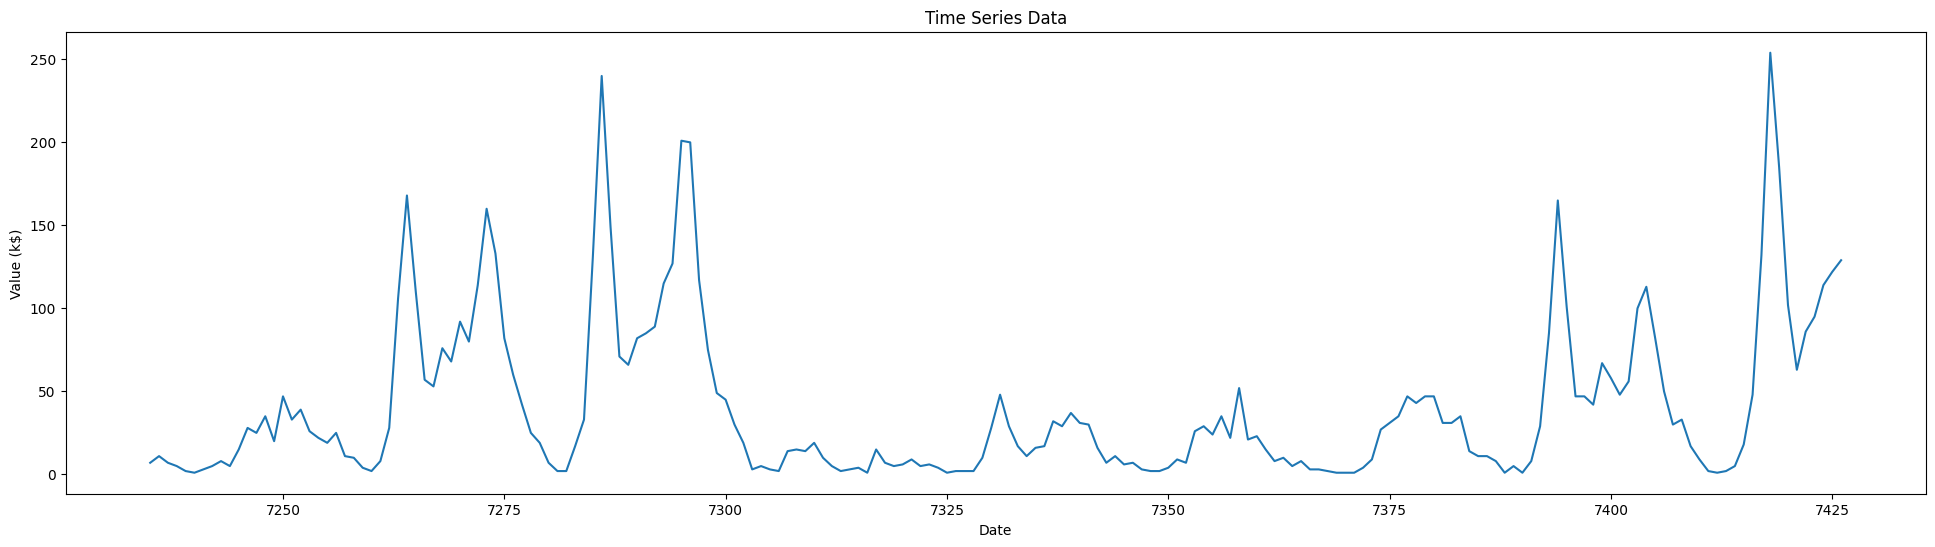

In [18]:
#plot linear chart of average daily
plt.figure(figsize=(24,6))
plt.plot( df['count'][:192])
plt.xlabel('Date')
plt.ylabel('Value (k$)')
plt.title('Time Series Data')
plt.show()

In [32]:
#create datetime obkect from pickuo hour and day
df['date'] = pd.to_datetime(df['pickup_day'].astype(str) + ' ' + df['pickup_hour'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')
df = df.sort_values('date')
df_test = df[:192]
df_test.head()

,start_cluster,pickup_day,pickup_hour,count,date
7235,1,2018-01-01,0,7,2018-01-01 00:00:00
7236,1,2018-01-01,1,11,2018-01-01 01:00:00
7237,1,2018-01-01,2,7,2018-01-01 02:00:00
7238,1,2018-01-01,3,5,2018-01-01 03:00:00
7239,1,2018-01-01,4,2,2018-01-01 04:00:00


ADF Statistic: -4.087875623798217
p-value: 0.0010141956128894183
5.438388480076578e-07


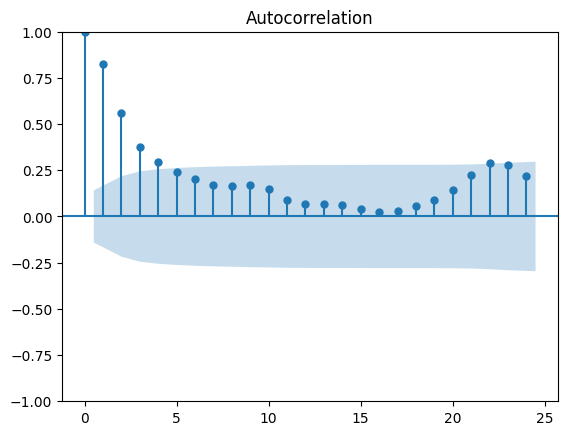

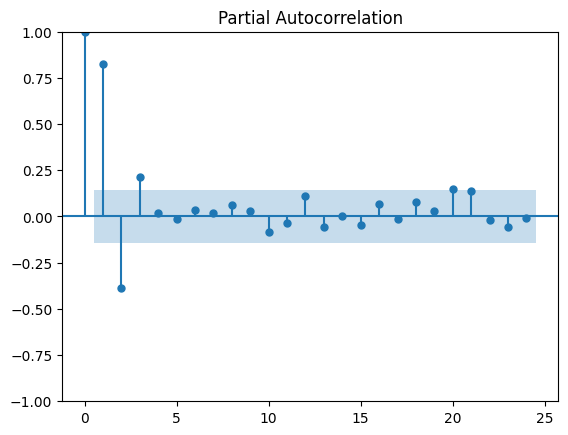

In [27]:

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_test['count'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

y_diff = df_test['count'].diff(1).dropna()
from statsmodels.tsa.stattools import adfuller
adf_result_diff = adfuller(y_diff)
print(adf_result_diff[1])  # new p-value

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y_season_diff = df['count'].diff(24).dropna()
plot_acf(df_test["count"], lags=24)
plot_pacf(df_test["count"], lags=24)
plt.show()



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_season_diff, lags=50)
plot_pacf(y_season_diff, lags=50)
plt.show()

c:\Users\fabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\fabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\fabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

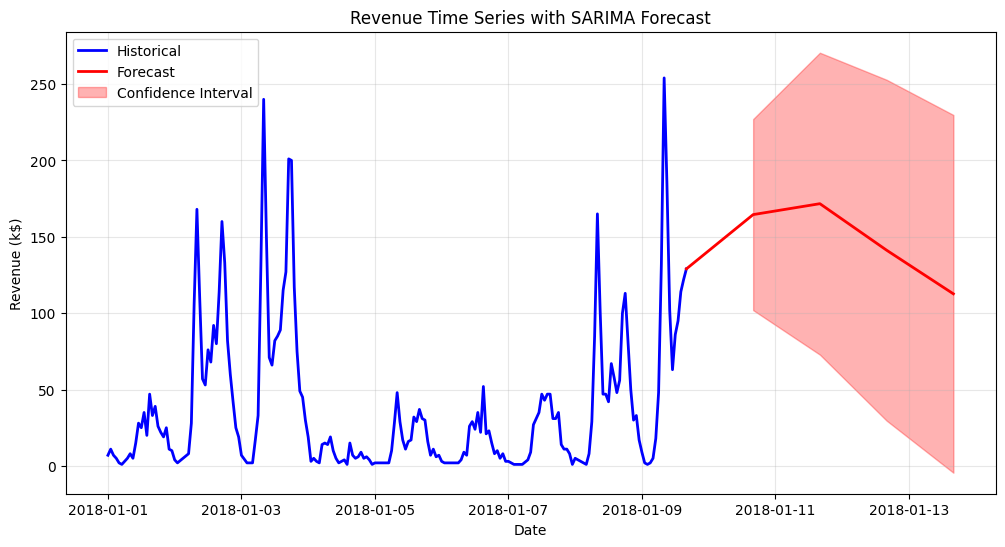

In [38]:
#train sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_rev = SARIMAX(df_test['count'], order=(4,1,0), seasonal_order=(0,1,0,24))
results = model_rev.fit()
forecast_rev = results.get_forecast(steps=4)
forecast_rev_ci = forecast_rev.conf_int()

# Plot original time series and forecast
plt.figure(figsize=(12, 6))
plt.plot(df_test['date'], df_test['count'], 'b-', label='Original Count', linewidth=2)

# Create future dates for forecast
last_date = df_test['date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=4, freq='D')

# Connect the forecast to the last historical point
last_value = df_test['count'].iloc[-1]
forecast_dates_connected = pd.concat([pd.Series([last_date]), pd.Series(future_dates)])
forecast_values_connected = pd.concat([pd.Series([last_value]), forecast_rev.predicted_mean])

# Plot forecast connected to historical data
plt.plot(forecast_dates_connected, forecast_values_connected, 'r-', linewidth=2, color="red", label='Forecast')

# Plot confidence intervals
plt.fill_between(future_dates, 
                forecast_rev_ci.iloc[:, 0], 
                forecast_rev_ci.iloc[:, 1], 
                alpha=0.3, color='red')

plt.xlabel('Date')
plt.ylabel('Revenue (k$)')
plt.title('Revenue Time Series with SARIMA Forecast')
plt.legend(['Historical', 'Forecast', 'Confidence Interval'])
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from pmdarima import auto_arima
model = auto_arima(df['Revenue (k$)'], seasonal=True, m=12)
print(model.summary())

ModuleNotFoundError: No module named 'pmdarima'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
metro_hourly = pd.read_csv('../data/MTA_Subway_Hourly_Ridership__2017-2019.csv')

C:\Users\fabia\AppData\Local\Temp\ipykernel_1396\1409378799.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  metro_hourly = pd.read_csv('../data/MTA_Subway_Hourly_Ridership__2017-2019.csv')


In [5]:
metro_hourly.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,12/20/2019 11:00:00 AM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Full Fare,48,14,40.761337,-73.96416,POINT (-73.96416 40.761337)
1,12/20/2019 08:00:00 AM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Unlimited 7-Day,36,0,40.757340,-73.95412,POINT (-73.95412 40.75734)
2,12/20/2019 07:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Full Fare,54,16,40.761337,-73.96416,POINT (-73.96416 40.761337)
3,12/20/2019 10:00:00 AM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Full Fare,48,2,40.757340,-73.95412,POINT (-73.95412 40.75734)
4,12/20/2019 03:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Seniors & Disability,13,6,40.761337,-73.96416,POINT (-73.96416 40.761337)


In [9]:
#print all uniwue values in column 'transit_mode'
print(metro_hourly['fare_class_category'].unique())

['Metrocard - Full Fare' 'Metrocard - Unlimited 7-Day'
 'Metrocard - Seniors & Disability' 'Metrocard - Other'
 'Metrocard - Unlimited 30-Day' 'Metrocard - Students'
 'Metrocard - Fair Fare' 'OMNY - Full Fare']


In [7]:
# Data Cleaning
metro_hourly.info()
metro_hourly['transit_timestamp'] = pd.to_datetime(metro_hourly['transit_timestamp'])

# print info on column transit_mode
metro_hourly['transit_mode'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57611916 entries, 0 to 57611915
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.2+ GB
<class 'pandas.core.series.Series'>
RangeIndex: 57611916 entries, 0 to 57611915
Series name: transit_mode
Non-Null Count     Dtype 
--------------     ----- 
57611916 non-null  object
dtypes: object(1)
memory usage: 439.5+ MB


In [6]:
metro_stations = pd.read_csv('../data/MTA_Subway_Stations.csv')
turnstile = pd.read_csv('../data/MTA_Subway_Turnstile_Usage_Data__2018.csv')
# metro_hourly = pd.read_csv('../data/MTA_Subway_Hourly_Entries_Exits.csv')
bike_stations = pd.read_csv('../data/processed_stations_2018.csv')
bike_trips = pd.read_csv('../data/processed_trips_2018.csv')

In [ ]:
metro_stations.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,127,317,611,IRT,Broadway - 7Av,Times Sq-42 St,M,True,1 2 3,Subway,40.755290,-73.987495,Uptown,Downtown,1,1,1,NaN,POINT (-73.987495 40.75529)
1,S17,515,515,SIR,Staten Island,Annadale,SI,False,SIR,Open Cut,40.540460,-74.178217,Ferry,South Shore,0,0,0,NaN,POINT (-74.178217 40.54046)
2,S01,139,627,BMT,Franklin Shuttle,Franklin Av,Bk,False,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,1,1,1,NaN,POINT (-73.955827 40.680596)
3,254,349,349,IRT,Eastern Pky,Junius St,Bk,False,3,Elevated,40.663515,-73.902447,Manhattan,New Lots,0,0,0,NaN,POINT (-73.902447 40.663515)
4,M01,108,108,BMT,Myrtle Av,Middle Village-Metropolitan Av,Q,False,M,Elevated,40.711396,-73.889601,Inbound,Last Stop,1,1,1,NaN,POINT (-73.889601 40.711396)


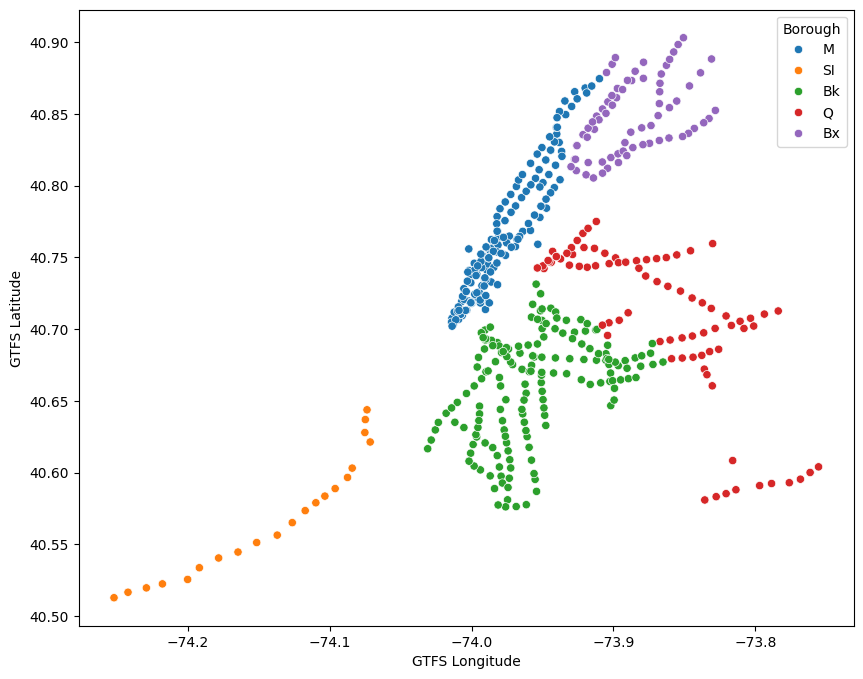

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=metro_stations, x='GTFS Longitude', y='GTFS Latitude', hue='Borough')
plt.show()

In [7]:
bike_stations.head()

,station_id,station_latitude,station_longitude,category
0,315.0,40.703554,-74.006702,both
1,3224.0,40.739974,-74.005139,both
2,386.0,40.714948,-74.002345,both
3,466.0,40.743954,-73.991449,both
4,438.0,40.727791,-73.985649,both


In [4]:
stations.dtypes

GTFS Stop ID              object
Station ID                 int64
Complex ID                 int64
Division                  object
Line                      object
Stop Name                 object
Borough                   object
CBD                         bool
Daytime Routes            object
Structure                 object
GTFS Latitude            float64
GTFS Longitude           float64
North Direction Label     object
South Direction Label     object
ADA                        int64
ADA Northbound             int64
ADA Southbound             int64
ADA Notes                 object
Georeference              object
dtype: object